In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import folium

In [6]:
# params ---- 1.
center = [37.541, 126.986]
tiles = ['OpenStreetMap']  #'cartodbpositron', 'Stamen Toner', 'OpenStreetMap'

# visualization ---- 2.
m = folium.Map(
    location = [center[0], center[1]],
    zoom_start = 12,
    tiles = tiles[0]
)

# show
m

In [3]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
print(folium.__version__)


0.14.0


In [8]:
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [9]:
# Initialize the map:
m = folium.Map(location=[37.562225, 126.978555], tiles="cartodbpositron", zoom_start=11)

m.choropleth(
    geo_data=state_geo,
    fill_color='green',
    fill_opacity=0.5,
    line_opacity=1.0,

    color = 'gray',
    legend_name = 'income'
)

m

/usr/local/lib/python3.10/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [10]:
#m.save('서울특별시행정구역.html')

In [37]:
# 고유값 개수
es_tow = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/서울시 전동킥보드 견인 현황.csv', encoding = 'euc-kr')

In [38]:
vc = es_tow['구정보'].value_counts().reset_index()

In [39]:
vcdf = pd.DataFrame({'구별': vc['index'], '반납량': vc['구정보']})
vcdf.to_csv('/content/drive/MyDrive/캡스톤디자인/data/구별 반납량.csv')

In [14]:
# 구별 반납량 지도 시각화
# 서울특별시 위도, 경도
seoul_location = [37.5665, 126.9780]

# Folium 맵 생성
m = folium.Map(location=seoul_location, tiles="cartodbpositron", zoom_start=11)

# Choropleth 맵 생성
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json',
    name='choropleth',
    data=vcdf,
    columns=['구별', '반납량'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='공유 전동 킥보드 반납량'
).add_to(m)

# 지도 출력
m

In [15]:
m.save('구별 반납량.html')

In [16]:
# 따릉이 대여소 위치 데이터 불러오기
bike_df = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/서울시 따릉이대여소 마스터 정보.csv', encoding = 'euc-kr')

In [17]:
# 행 값이 0인 경우 제거
bike_df = bike_df[bike_df['위도'] != 0]
bike_df.head()

,대여소_ID,주소1,주소2,위도,경도
2,ST-997,서울특별시 양천구 목동중앙로 49,목동3단지 시내버스정류장,37.534390,126.869598
3,ST-996,서울특별시 양천구 남부순환로88길5-16,양강중학교앞 교차로,37.524334,126.850548
4,ST-995,서울특별시 양천구 신정동 621-14,계남공원 입구 주출입구 좌측,37.510681,126.857399
5,ST-994,서울특별시 양천구 목동서로161,SBS방송국,37.529163,126.872749
6,ST-993,서울특별시 양천구 신월로 342-1 구두수선대19,NaN,37.521511,126.857384


In [18]:
# 따릉이 대여소 위도/경도
lat_bike = bike_df['위도']
lon_bike = bike_df['경도']

In [19]:
# 따릉이 위치 표시(blue)
for lat, lon in zip(lat_bike, lon_bike):
    folium.Circle(location = [lat, lon], radius = 3, color='blue', fill_color = 'blue', weight=1).add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

In [20]:
m.save('따릉이대여소.html')

재실행....

In [21]:

# 구별 반납량 지도 시각화
# 서울특별시 위도, 경도
seoul_location = [37.5665, 126.9780]

# Folium 맵 생성
m1 = folium.Map(location=seoul_location, tiles="cartodbpositron", zoom_start=11)

# Choropleth 맵 생성
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json',
    name='choropleth',
    data=vcdf,
    columns=['구별', '반납량'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='공유 전동 킥보드 반납량'
).add_to(m1)

# 지도 출력
m1

In [22]:
# 따릉이 위치 표시(blue)
for lat, lon in zip(lat_bike, lon_bike):
    folium.Circle(location = [lat, lon], radius = 3, color='blue', fill_color = 'blue', weight=1).add_to(m1)

m1

Output hidden; open in https://colab.research.google.com to view.

In [23]:
# 지하철역 지도 시각화(gray)
subway = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/서울교통공사_1_8호선 역사 좌표(위경도) 정보_20211231.csv', encoding = 'euc-kr')
subway = subway.drop(['작성일자'], axis=1)

lat_subway = subway['위도']
lon_subway = subway['경도']

In [24]:
for lat, lon in zip(lat_subway, lon_subway):
    folium.Circle(location = [lat, lon], radius = 200, color='gray', fill_color = 'gray', weight=1).add_to(m1)

m1

Output hidden; open in https://colab.research.google.com to view.

In [33]:
# 구별 위경도 변환 csv 불러오기
강남구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/강남구_견인현황_위경도.csv')
강동구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/강동구_견인현황_위경도.csv')
강북구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/강북구_견인현황_위경도.csv')
강서구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/강서구_견인현황_위경도.csv')
관악구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/관악구_견인현황_위경도.csv')
광진구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/광진구_견인현황_위경도.csv')
구로구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/구로구_견인현황_위경도.csv')
금천구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/금천구_견인현황_위경도.csv')
노원구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/노원구_견인현황_위경도.csv')
도봉구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/도봉구_견인현황_위경도.csv')
동대문구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/동대문구_견인현황_위경도.csv')
동작구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/동작구_견인현황_위경도.csv')
마포구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/마포구_견인현황_위경도.csv')
서대문구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/서대문구_견인현황_위경도.csv')
서초구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/서초구_견인현황_위경도.csv')
성동구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/성동구_견인현황_위경도.csv')
성북구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/성북구_견인현황_위경도.csv')
송파구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/송파구_견인현황_위경도.csv')
양천구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/양천구_견인현황_위경도.csv')
영등포구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/영등포구_견인현황_위경도.csv')
용산구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/용산구_견인현황_위경도.csv')
은평구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/은평구_견인현황_위경도.csv')
종로구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/종로구_견인현황_위경도.csv')
중구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/중구_견인현황_위경도.csv')
중랑구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/중랑구_견인현황_위경도.csv')

In [34]:
# 데이터프레임 병합(concat)
all = pd.concat([강남구, 강동구, 강북구, 강서구, 관악구, 광진구, 구로구, 금천구, 노원구,
                 도봉구, 동대문구, 동작구, 마포구, 서대문구, 서초구, 성동구, 성북구, 송파구,
                 양천구, 영등포구, 용산구, 은평구, 종로구, 중구, 중랑구])

In [35]:
# 행 값이 0인 경우 제거
all = all[all['위도'] != 0]

In [36]:
all.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/alldf.csv')

In [28]:
all.head()

,Unnamed: 0,구정보,주소,유형,위도,경도
0,5608,강남구,서울특별시 강남구 논현동 279-134,보도와 차도가 구분된 도로의 차도,37.515224,127.030121
1,5613,강남구,서울특별시 강남구 논현동 279-134,보도와 차도가 구분된 도로의 차도,37.515224,127.030121
2,5616,강남구,서울특별시 강남구 논현동 279-134,보도와 차도가 구분된 도로의 차도,37.515224,127.030121
3,5697,강남구,서울특별시 강남구 대치동 1004,보도 중앙,37.498920,127.065786
4,5699,강남구,서울특별시 강남구 대치동 1004,보도 중앙,37.498920,127.065786


In [29]:
allvc = all['유형'].value_counts().reset_index()
allvcdf = pd.DataFrame({'유형': allvc['index'], '개수': allvc['유형']})
allvcdf

,유형,개수
0,보도와 차도가 구분된 도로의 차도,24550
1,"횡단보도, 산책로 등",9142
2,"버스정류장, 택시 승강장",7449
3,"점자블록, 엘리베이터 입구",4237
4,지하철역 진출입로 및 주변,3259
5,자전거 도로,2842
6,보도 중앙,2640
7,기타,699
8,"건물, 상가 보행자 진출입",93
9,오신고,48


In [30]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [31]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

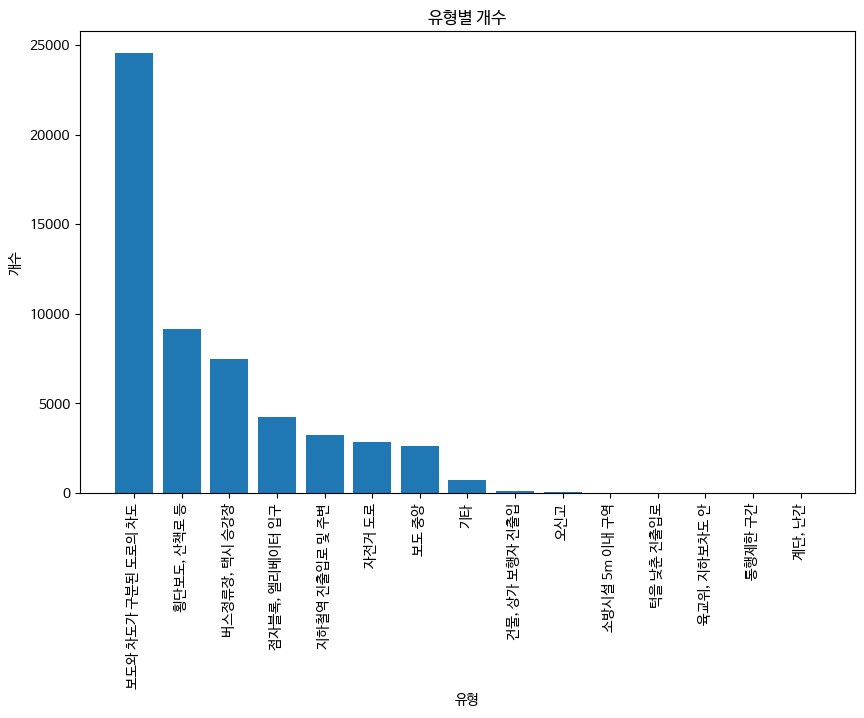

In [32]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기
plt.bar(allvcdf['유형'], allvcdf['개수'])

# 그래프 제목 설정
plt.title('유형별 개수')

# x축 라벨 설정
plt.xlabel('유형')

# y축 라벨 설정
plt.ylabel('개수')

# x축 눈금 라벨 각도 설정 (옵션)
plt.xticks(rotation=90)

# 그래프 출력
plt.show()

In [33]:
# 특정 조건에 맞는 데이터 추출
강남구 = all[all['구정보'] == '강남구']
강동구 = all[all['구정보'] == '강동구']
강북구 = all[all['구정보'] == '강북구']
강서구 = all[all['구정보'] == '강서구']
관악구 = all[all['구정보'] == '관악구']
광진구 = all[all['구정보'] == '광진구']
구로구 = all[all['구정보'] == '구로구']
금천구 = all[all['구정보'] == '금천구']
노원구 = all[all['구정보'] == '노원구']
도봉구 = all[all['구정보'] == '도봉구']
동대문구 = all[all['구정보'] == '동대문구']
동작구 = all[all['구정보'] == '동작구']
마포구 = all[all['구정보'] == '마포구']
서대문구 = all[all['구정보'] == '서대문구']
서초구 = all[all['구정보'] == '서초구']
성동구 = all[all['구정보'] == '성동구']
성북구 = all[all['구정보'] == '성북구']
송파구 = all[all['구정보'] == '송파구']
양천구 = all[all['구정보'] == '양천구']
영등포구 = all[all['구정보'] == '영등포구']
용산구 = all[all['구정보'] == '용산구']
은평구 = all[all['구정보'] == '은평구']
종로구 = all[all['구정보'] == '종로구']
중구 = all[all['구정보'] == '중구']
중랑구 = all[all['구정보'] == '중랑구']

In [34]:
#
강남구.shape

(521, 6)

In [35]:
강남구_100 = 강남구.head(100)

In [36]:
lat_강남구_100 = 강남구_100['위도']
lon_강남구_100 = 강남구_100['경도']

In [37]:
lat_강남구 = 강남구['위도']
lon_강남구 = 강남구['경도']

lat_강동구 = 강동구['위도']
lon_강동구 = 강동구['경도']

lat_강북구 = 강북구['위도']
lon_강북구 = 강북구['경도']

lat_강서구 = 강서구['위도']
lon_강서구 = 강서구['경도']

lat_관악구 = 관악구['위도']
lon_관악구 = 관악구['경도']

lat_광진구 = 광진구['위도']
lon_광진구 = 광진구['경도']

lat_구로구 = 구로구['위도']
lon_구로구 = 구로구['경도']

lat_금천구 = 금천구['위도']
lon_금천구 = 금천구['경도']

lat_노원구 = 노원구['위도']
lon_노원구 = 노원구['경도']

lat_도봉구 = 도봉구['위도']
lon_도봉구 = 도봉구['경도']

lat_동대문구 = 동대문구['위도']
lon_동대문구 = 동대문구['경도']

lat_동작구 = 동작구['위도']
lon_동작구 = 동작구['경도']

lat_마포구 = 마포구['위도']
lon_마포구 = 마포구['경도']

lat_서대문구 = 서대문구['위도']
lon_서대문구 = 서대문구['경도']

lat_서초구 = 서초구['위도']
lon_서초구 = 서초구['경도']

lat_성동구 = 성동구['위도']
lon_성동구 = 성동구['경도']

lat_성북구 = 성북구['위도']
lon_성북구 = 성북구['경도']

lat_송파구 = 송파구['위도']
lon_송파구 = 송파구['경도']

lat_양천구 = 양천구['위도']
lon_양천구 = 양천구['경도']

lat_영등포구 = 영등포구['위도']
lon_영등포구 = 영등포구['경도']

lat_용산구 = 용산구['위도']
lon_용산구 = 용산구['경도']

lat_은평구 = 은평구['위도']
lon_은평구 = 은평구['경도']

lat_종로구 = 종로구['위도']
lon_종로구 = 종로구['경도']

lat_중구 = 중구['위도']
lon_중구 = 중구['경도']

lat_중랑구 = 중랑구['위도']
lon_중랑구 = 중랑구['경도']

In [38]:
# 서울특별시 위도, 경도
seoul_location = [37.5665, 126.9780]

# Folium 맵 생성
m2 = folium.Map(location=seoul_location, tiles="cartodbpositron", zoom_start=11)

# Choropleth 맵 생성
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json',
    name='choropleth',
    data=vcdf,
    columns=['구별', '반납량'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='공유 전동 킥보드 반납량'
).add_to(m2)

# 지도 출력
m2

In [39]:
for lat, lon in zip(lat_강남구_100, lat_강남구_100):
    folium.Circle(location = [lat, lon], radius = 3, color='orange', fill_color = 'orange', weight=1).add_to(m2)

#for lat, lon in zip(lat_강남구, lat_강남구):
#   folium.Circle(location = [lat, lon], radius = 3, color='purple', fill_color = 'purple', weight=1).add_to(m2)
'''
for lat, lon in zip(lat_강동구, lat_강동구):
    folium.Circle(location = [lat, lon], radius = 3, color='orange', fill_color = 'orange', weight=1).add_to(m2)

for lat, lon in zip(lat_강북구, lat_강북구):
    folium.Circle(location = [lat, lon], radius = 3, color='darkred', fill_color = 'darkred', weight=1).add_to(m2)

for lat, lon in zip(lat_강서구, lat_강서구):
    folium.Circle(location = [lat, lon], radius = 3, color='lightred', fill_color = 'lightred', weight=1).add_to(m2)

for lat, lon in zip(lat_관악구, lat_관악구):
    folium.Circle(location = [lat, lon], radius = 3, color='beige', fill_color = 'beige', weight=1).add_to(m2)

for lat, lon in zip(lat_광진구, lat_광진구):
    folium.Circle(location = [lat, lon], radius = 3, color='darkblue', fill_color = 'darkblue', weight=1).add_to(m2)

for lat, lon in zip(lat_구로구, lat_구로구):
    folium.Circle(location = [lat, lon], radius = 3, color='lightblue', fill_color = 'lightblue', weight=1).add_to(m2)

for lat, lon in zip(lat_금천구, lat_금천구):
    folium.Circle(location = [lat, lon], radius = 3, color='darkgreen', fill_color = 'darkgreen', weight=1).add_to(m2)
'''
m2

In [40]:
for lat, lon in zip(lat_노원구, lat_노원구):
    folium.Circle(location = [lat, lon], radius = 3, color='lightgreen', fill_color = 'lightgreen', weight=1).add_to(m1)

for lat, lon in zip(lat_도봉구, lat_도봉구):
    folium.Circle(location = [lat, lon], radius = 3, color='cadetblue', fill_color = 'cadetblue', weight=1).add_to(m1)

for lat, lon in zip(lat_동대문구, lat_동대문구):
    folium.Circle(location = [lat, lon], radius = 3, color='darkpurple', fill_color = 'darkpurple', weight=1).add_to(m1)

for lat, lon in zip(lat_동작구, lat_동작구):
    folium.Circle(location = [lat, lon], radius = 3, color='pink', fill_color = 'pink', weight=1).add_to(m1) 

for lat, lon in zip(lat_마포구, lat_마포구):
    folium.Circle(location = [lat, lon], radius = 3, color='red', fill_color = 'red', weight=1).add_to(m1) 

for lat, lon in zip(lat_서대문구, lat_서대문구):
    folium.Circle(location = [lat, lon], radius = 3, color='lightgray', fill_color = 'lightgray', weight=1).add_to(m1) 

for lat, lon in zip(lat_서초구, lat_서초구):
    folium.Circle(location = [lat, lon], radius = 3, color='blak', fill_color = 'blak', weight=1).add_to(m1) 

for lat, lon in zip(lat_성동구, lat_성동구):
    folium.Circle(location = [lat, lon], radius = 3, color='darkgray', fill_color = 'darkgray', weight=1).add_to(m1) 

for lat, lon in zip(lat_성북구, lat_성북구):
    folium.Circle(location = [lat, lon], radius = 3, color='white', fill_color = 'white', weight=1).add_to(m1) 

for lat, lon in zip(lat_송파구, lat_송파구):
    folium.Circle(location = [lat, lon], radius = 3, color='green', fill_color = 'green', weight=1).add_to(m1) 

for lat, lon in zip(lat_양천구, lat_양천구):
    folium.Circle(location = [lat, lon], radius = 3, color='lightyellow', fill_color = 'lightyellow', weight=1).add_to(m1) 

for lat, lon in zip(lat_영등포구, lat_영등포구):
    folium.Circle(location = [lat, lon], radius = 3, color='lightorange', fill_color = 'lightorange', weight=1).add_to(m1)

for lat, lon in zip(lat_용산구, lat_용산구):
    folium.Circle(location = [lat, lon], radius = 3, color='darkbeige', fill_color = 'darkbeige', weight=1).add_to(m1)

for lat, lon in zip(lat_은평구, lat_은평구):
    folium.Circle(location = [lat, lon], radius = 3, color='darkorange', fill_color = 'darkorange', weight=1).add_to(m1)

for lat, lon in zip(lat_종로구, lat_종로구):
    folium.Circle(location = [lat, lon], radius = 3, color='lightbeige', fill_color = 'lightbeige', weight=1).add_to(m1)

for lat, lon in zip(lat_중구, lat_중구):
    folium.Circle(location = [lat, lon], radius = 3, color='darkpink', fill_color = 'darkpink', weight=1).add_to(m1)

for lat, lon in zip(lat_중랑구, lat_중랑구):
    folium.Circle(location = [lat, lon], radius = 3, color='lightpink', fill_color = 'lightpink', weight=1).add_to(m1)

In [41]:
m2.save('test.html')

In [42]:
import folium

# 지도 초기화
m3 = folium.Map(location=[37.5665, 126.9780],  tiles="cartodbpositron", zoom_start=11)

# 데이터프레임에서 위도, 경도 추출
lat_강남구 = 강남구['위도']
lon_강남구 = 강남구['경도']

# 데이터프레임의 각 위치에 원 추가
for lat, lon in zip(lat_강남구, lon_강남구):
    folium.CircleMarker(location=[lat, lon], radius=3, color='orange', fill_color='orange').add_to(m3)

# 지도 출력
m3

In [43]:
# 서울특별시 위도, 경도
seoul_location = [37.5665, 126.9780]

# Folium 맵 생성
m4 = folium.Map(location=seoul_location, tiles="cartodbpositron", zoom_start=11)

# Choropleth 맵 생성
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json',
    name='choropleth',
    data=vcdf,
    columns=['구별', '반납량'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='공유 전동 킥보드 반납량'
).add_to(m4)

# 데이터프레임에서 위도, 경도 추출
lat_강남구 = 강남구['위도']
lon_강남구 = 강남구['경도']

# 지하철역
for lat, lon in zip(lat_subway, lon_subway):
    folium.Circle(location = [lat, lon], radius = 200, color='gray', fill_color = 'gray', weight=1).add_to(m4)

# 따릉이
for lat, lon in zip(lat_bike, lon_bike):
    folium.Circle(location = [lat, lon], radius = 3, color='blue', fill_color = 'blue', weight=1).add_to(m4)

# 데이터프레임의 각 위치에 원 추가
for lat, lon in zip(lat_강남구, lon_강남구):
    folium.CircleMarker(location=[lat, lon], radius=3, color='orange', fill_color='orange').add_to(m4)

for lat, lon in zip(lat_강동구, lat_강동구):
    folium.Circle(location = [lat, lon], radius = 3, color='purple', fill_color = 'orange', weight=1).add_to(m4)

for lat, lon in zip(lat_강북구, lat_강북구):
    folium.Circle(location = [lat, lon], radius = 3, color='darkred', fill_color = 'darkred', weight=1).add_to(m4)

for lat, lon in zip(lat_강서구, lat_강서구):
    folium.Circle(location = [lat, lon], radius = 3, color='lightred', fill_color = 'lightred', weight=1).add_to(m4)

for lat, lon in zip(lat_관악구, lat_관악구):
    folium.Circle(location = [lat, lon], radius = 3, color='beige', fill_color = 'beige', weight=1).add_to(m4)

for lat, lon in zip(lat_광진구, lat_광진구):
    folium.Circle(location = [lat, lon], radius = 3, color='darkblue', fill_color = 'darkblue', weight=1).add_to(m4)

for lat, lon in zip(lat_구로구, lat_구로구):
    folium.Circle(location = [lat, lon], radius = 3, color='lightblue', fill_color = 'lightblue', weight=1).add_to(m4)

for lat, lon in zip(lat_금천구, lat_금천구):
    folium.Circle(location = [lat, lon], radius = 3, color='darkgreen', fill_color = 'darkgreen', weight=1).add_to(m4)

# 지도 출력
m4

Output hidden; open in https://colab.research.google.com to view.

In [44]:
for lat, lon in zip(lat_강동구, lat_강동구):
    folium.Circle(location = [lat, lon], radius = 3, color='purple', fill_color = 'orange', weight=1).add_to(m4)

for lat, lon in zip(lat_강북구, lat_강북구):
    folium.Circle(location = [lat, lon], radius = 3, color='darkred', fill_color = 'darkred', weight=1).add_to(m4)

for lat, lon in zip(lat_강서구, lat_강서구):
    folium.Circle(location = [lat, lon], radius = 3, color='lightred', fill_color = 'lightred', weight=1).add_to(m4)

for lat, lon in zip(lat_관악구, lat_관악구):
    folium.Circle(location = [lat, lon], radius = 3, color='beige', fill_color = 'beige', weight=1).add_to(m4)

for lat, lon in zip(lat_광진구, lat_광진구):
    folium.Circle(location = [lat, lon], radius = 3, color='darkblue', fill_color = 'darkblue', weight=1).add_to(m4)

for lat, lon in zip(lat_구로구, lat_구로구):
    folium.Circle(location = [lat, lon], radius = 3, color='lightblue', fill_color = 'lightblue', weight=1).add_to(m4)

for lat, lon in zip(lat_금천구, lat_금천구):
    folium.Circle(location = [lat, lon], radius = 3, color='darkgreen', fill_color = 'darkgreen', weight=1).add_to(m4)

In [45]:
m4


Output hidden; open in https://colab.research.google.com to view.

In [46]:
# 서울특별시 위도, 경도
seoul_location = [37.5665, 126.9780]

# Folium 맵 생성
m5 = folium.Map(location=seoul_location, tiles="cartodbpositron", zoom_start=11)

# Choropleth 맵 생성
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json',
    name='choropleth',
    data=vcdf,
    columns=['구별', '반납량'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='공유 전동 킥보드 반납량'
).add_to(m5)

마포구_sample = 마포구.sample(n=50, random_state=42)

# 데이터프레임에서 위도, 경도 추출
lat_마포구 = 마포구_sample['위도']
lon_마포구 = 마포구_sample['경도']

# 지하철역
for lat, lon in zip(lat_subway, lon_subway):
    folium.Circle(location = [lat, lon], radius = 200, color='gray', fill_color = 'gray', weight=1).add_to(m5)

# 따릉이
for lat, lon in zip(lat_bike, lon_bike):
    folium.Circle(location = [lat, lon], radius = 3, color='blue', fill_color = 'blue', weight=1).add_to(m5)

# 마포구
for lat, lon in zip(lat_마포구, lat_마포구):
    folium.Circle(location = [lat, lon], radius = 3, color='red', fill_color = 'red', weight=1).add_to(m5)

m5

Output hidden; open in https://colab.research.google.com to view.

In [51]:
# 서울특별시 위도, 경도
seoul_location = [37.5665, 126.9780]

# Folium 맵 생성
m6 = folium.Map(location=seoul_location, tiles="cartodbpositron", zoom_start=11)

# Choropleth 맵 생성
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json',
    name='choropleth',
    data=vcdf,
    columns=['구별', '반납량'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='공유 전동 킥보드 반납량'
).add_to(m6)

마포구_sample = 마포구.sample(n=10, random_state=42)
마포구_sample = pd.DataFrame(마포구_sample)

'''
# 데이터프레임에서 위도, 경도 추출
lat_마포구 = 마포구['위도']
lon_마포구 = 마포구['경도']

# 지하철역
for lat, lon in zip(lat_subway, lon_subway):
    folium.Circle(location = [lat, lon], radius = 200, color='gray', fill_color = 'gray', weight=1).add_to(m5)

# 따릉이
for lat, lon in zip(lat_bike, lon_bike):
    folium.Circle(location = [lat, lon], radius = 3, color='blue', fill_color = 'blue', weight=1).add_to(m5)

# 마포구
for lat, lon in zip(lat_마포구, lat_마포구):
    folium.Circle(location = [lat, lon], radius = 3, color='red', fill_color = 'red', weight=1).add_to(m6)

m6
'''

"\n# 데이터프레임에서 위도, 경도 추출\nlat_마포구 = 마포구['위도']\nlon_마포구 = 마포구['경도']\n\n# 지하철역\nfor lat, lon in zip(lat_subway, lon_subway):\n    folium.Circle(location = [lat, lon], radius = 200, color='gray', fill_color = 'gray', weight=1).add_to(m5)\n\n# 따릉이\nfor lat, lon in zip(lat_bike, lon_bike):\n    folium.Circle(location = [lat, lon], radius = 3, color='blue', fill_color = 'blue', weight=1).add_to(m5)\n\n# 마포구\nfor lat, lon in zip(lat_마포구, lat_마포구):\n    folium.Circle(location = [lat, lon], radius = 3, color='red', fill_color = 'red', weight=1).add_to(m6)\n\nm6\n"

In [48]:
마포구_sample

,Unnamed: 0,구정보,주소,유형,위도,경도
3850,35044,마포구,서울특별시 마포구 서교동 465-1,"횡단보도, 산책로 등",37.555071,126.923825
1579,18686,마포구,서울특별시 마포구 도화동 250-7,보도와 차도가 구분된 도로의 차도,37.538417,126.948966
4540,40118,마포구,서울특별시 마포구 신수동 430-1,지하철역 진출입로 및 주변,37.546203,126.935938
3770,34392,마포구,서울특별시 마포구 합정동 436-31,보도와 차도가 구분된 도로의 차도,37.546780,126.908400
4607,40531,마포구,서울특별시 마포구 동교동 192-45,보도와 차도가 구분된 도로의 차도,37.557142,126.926190
4050,36305,마포구,서울특별시 마포구 아현동 354-23,보도 중앙,37.550547,126.952464
6121,51219,마포구,서울특별시 마포구 서교동 404-24,보도 중앙,37.553174,126.918200
1529,18181,마포구,서울특별시 마포구 신수동 357-2,보도 중앙,37.546203,126.935938
1912,21151,마포구,서울특별시 마포구 도화동 293-3,보도와 차도가 구분된 도로의 차도,37.538417,126.948966
4395,38981,마포구,서울특별시 마포구 상암동 1711,보도와 차도가 구분된 도로의 차도,37.571572,126.872806


In [52]:
# 데이터프레임에서 위도, 경도 추출
lat_마포구 = 마포구_sample['위도']
lon_마포구 = 마포구_sample['경도']

# 지하철역
for lat, lon in zip(lat_subway, lon_subway):
    folium.Circle(location = [lat, lon], radius = 200, color='gray', fill_color = 'gray', weight=1).add_to(m6)

# 따릉이
for lat, lon in zip(lat_bike, lon_bike):
    folium.Circle(location = [lat, lon], radius = 3, color='blue', fill_color = 'blue', weight=1).add_to(m6)

# 마포구
for lat, lon in zip(lat_마포구, lat_마포구):
    folium.Circle(location = [lat, lon], radius = 3, color='red', fill_color = 'red', weight=1).add_to(m6)

m6

Output hidden; open in https://colab.research.google.com to view.

In [50]:
# 마포구
for lat, lon in zip(lat_마포구, lat_마포구):
    folium.Circle(location = [lat, lon], radius = 3, color='red', fill_color = 'red', weight=1).add_to(m6)

m6

Output hidden; open in https://colab.research.google.com to view.

In [6]:
# 유동 인구

유동인구 = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/자치구단위 서울생활인구 일별 집계표.csv', encoding = 'euc-kr')
유동인구.head()

,기준일ID,시군구코드,시군구명,총생활인구수,내국인생활인구수,장기체류외국인인구수,단기체류외국인인구수,일최대인구수,일최소인구수,주간인구수(09~18),야간인구수(19~08),일최대이동인구수,서울외유입인구수,동일자치구행정동간이동인구수,자치구간이동인구수
0,20230505,11000,서울시,1.034665e+07,9.777497e+06,394634.0757,174517.9528,1.049296e+07,1.014911e+07,1.032711e+07,1.036061e+07,4.224878e+06,1.053025e+06,1.705464e+06,1.466389e+06
1,20230505,11110,종로구,2.673139e+05,2.357435e+05,17620.6005,13949.8065,3.298385e+05,2.293164e+05,3.029938e+05,2.418282e+05,1.675709e+05,5.189684e+04,2.562945e+04,9.004458e+04
2,20230505,11140,중구,2.568244e+05,2.001428e+05,18266.6100,38414.9187,3.125960e+05,2.144295e+05,2.922217e+05,2.315406e+05,1.635402e+05,4.542229e+04,2.558237e+04,9.253551e+04
3,20230505,11170,용산구,2.933280e+05,2.680734e+05,16811.1645,8443.4298,3.225949e+05,2.727246e+05,3.111324e+05,2.806106e+05,1.442617e+05,4.489360e+04,3.678465e+04,6.258346e+04
4,20230505,11200,성동구,3.319622e+05,3.133827e+05,15798.4695,2781.0347,3.370689e+05,3.182236e+05,3.337200e+05,3.307067e+05,1.438171e+05,3.068639e+04,4.867101e+04,6.445973e+04


In [13]:
유동인구_drop = ['내국인생활인구수',	'장기체류외국인인구수',	'단기체류외국인인구수',	'일최대인구수',	'일최소인구수',
             '주간인구수(09~18)',	'야간인구수(19~08)',	'일최대이동인구수',	'서울외유입인구수',	'동일자치구행정동간이동인구수',	'자치구간이동인구수']
유동인구_removed = 유동인구.drop(유동인구_drop, axis=1)
유동인구_removed

,기준일ID,시군구코드,시군구명,총생활인구수
0,20230505,11000,서울시,1.034665e+07
1,20230505,11110,종로구,2.673139e+05
2,20230505,11140,중구,2.568244e+05
3,20230505,11170,용산구,2.933280e+05
4,20230505,11200,성동구,3.319622e+05
...,...,...,...,...
47939,20180405,11620,관악구,5.272641e+05
47940,20180405,11650,서초구,6.570409e+05
47941,20180405,11680,강남구,9.128639e+05
47942,20180405,11710,송파구,7.733757e+05


In [16]:
유동인구1 = 유동인구_removed.loc[:25]
유동인구1

,기준일ID,시군구코드,시군구명,총생활인구수
0,20230505,11000,서울시,1.034665e+07
1,20230505,11110,종로구,2.673139e+05
2,20230505,11140,중구,2.568244e+05
3,20230505,11170,용산구,2.933280e+05
4,20230505,11200,성동구,3.319622e+05
5,20230505,11215,광진구,3.783176e+05
6,20230505,11230,동대문구,3.702202e+05
7,20230505,11260,중랑구,3.578358e+05
8,20230505,11290,성북구,4.350458e+05
9,20230505,11305,강북구,2.940357e+05


In [20]:
유동인구2 = 유동인구_removed.loc[26:51]
유동인구2

,기준일ID,시군구코드,시군구명,총생활인구수
26,20230504,11000,서울시,1.096591e+07
27,20230504,11110,종로구,3.379359e+05
28,20230504,11140,중구,3.552463e+05
29,20230504,11170,용산구,3.131747e+05
30,20230504,11200,성동구,3.668985e+05
31,20230504,11215,광진구,3.858849e+05
32,20230504,11230,동대문구,3.848373e+05
33,20230504,11260,중랑구,3.396515e+05
34,20230504,11290,성북구,4.403341e+05
35,20230504,11305,강북구,2.780417e+05


In [22]:
유동인구3 = 유동인구_removed.loc[52:77]
유동인구3

,기준일ID,시군구코드,시군구명,총생활인구수
52,20230503,11000,서울시,1.100024e+07
53,20230503,11110,종로구,3.385986e+05
54,20230503,11140,중구,3.617434e+05
55,20230503,11170,용산구,3.097343e+05
56,20230503,11200,성동구,3.686616e+05
57,20230503,11215,광진구,3.840620e+05
58,20230503,11230,동대문구,3.874598e+05
59,20230503,11260,중랑구,3.396483e+05
60,20230503,11290,성북구,4.441085e+05
61,20230503,11305,강북구,2.785499e+05


In [24]:
유동인구4 = 유동인구_removed.loc[208:233]
유동인구4

,기준일ID,시군구코드,시군구명,총생활인구수
208,20230427,11000,서울시,1.102252e+07
209,20230427,11110,종로구,3.391004e+05
210,20230427,11140,중구,3.633574e+05
211,20230427,11170,용산구,3.117695e+05
212,20230427,11200,성동구,3.668792e+05
213,20230427,11215,광진구,3.845797e+05
214,20230427,11230,동대문구,3.849920e+05
215,20230427,11260,중랑구,3.397806e+05
216,20230427,11290,성북구,4.414394e+05
217,20230427,11305,강북구,2.792848e+05


In [26]:
유동인구5 = 유동인구_removed.loc[260:285]
유동인구5

,기준일ID,시군구코드,시군구명,총생활인구수
260,20230425,11000,서울시,1.103353e+07
261,20230425,11110,종로구,3.277062e+05
262,20230425,11140,중구,3.626631e+05
263,20230425,11170,용산구,3.080001e+05
264,20230425,11200,성동구,3.674045e+05
265,20230425,11215,광진구,3.829070e+05
266,20230425,11230,동대문구,3.890068e+05
267,20230425,11260,중랑구,3.422577e+05
268,20230425,11290,성북구,4.459436e+05
269,20230425,11305,강북구,2.813079e+05


In [27]:
유동인구6 = 유동인구_removed.loc[520:545]
유동인구6

,기준일ID,시군구코드,시군구명,총생활인구수
520,20230415,11000,서울시,1.068919e+07
521,20230415,11110,종로구,2.893568e+05
522,20230415,11140,중구,2.745902e+05
523,20230415,11170,용산구,3.042379e+05
524,20230415,11200,성동구,3.448470e+05
525,20230415,11215,광진구,3.912841e+05
526,20230415,11230,동대문구,3.807033e+05
527,20230415,11260,중랑구,3.578412e+05
528,20230415,11290,성북구,4.448110e+05
529,20230415,11305,강북구,2.925740e+05


In [30]:
유동인구7 = 유동인구_removed.loc[10400:15131]
유동인구7

,기준일ID,시군구코드,시군구명,총생활인구수
10400,20220331,11000,서울시,1.091861e+07
10401,20220331,11110,종로구,3.060942e+05
10402,20220331,11140,중구,3.107236e+05
10403,20220331,11170,용산구,3.000151e+05
10404,20220331,11200,성동구,3.676283e+05
...,...,...,...,...
15127,20211001,11620,관악구,4.818280e+05
15128,20211001,11650,서초구,5.961425e+05
15129,20211001,11680,강남구,8.499443e+05
15130,20211001,11710,송파구,7.575994e+05


In [31]:
# '기준일ID'가 2022년에 해당하는 행만 추출
유동인구2022 = 유동인구7[유동인구7['기준일ID'].str.startswith('2022')]
유동인구2022

AttributeError: ignored

In [32]:
# Convert '기준일ID' column to datetime type
유동인구7['기준일ID'] = pd.to_datetime(유동인구7['기준일ID'], format='%Y%m%d')

# Extract rows for the year 2022
유동인구2022 = 유동인구7[유동인구7['기준일ID'].dt.year == 2022]
유동인구2022

<ipython-input-32-510b267bc978>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  유동인구7['기준일ID'] = pd.to_datetime(유동인구7['기준일ID'], format='%Y%m%d')


,기준일ID,시군구코드,시군구명,총생활인구수
10400,2022-03-31,11000,서울시,1.091861e+07
10401,2022-03-31,11110,종로구,3.060942e+05
10402,2022-03-31,11140,중구,3.107236e+05
10403,2022-03-31,11170,용산구,3.000151e+05
10404,2022-03-31,11200,성동구,3.676283e+05
...,...,...,...,...
12735,2022-01-01,11620,관악구,4.878347e+05
12736,2022-01-01,11650,서초구,4.715796e+05
12737,2022-01-01,11680,강남구,6.530989e+05
12738,2022-01-01,11710,송파구,7.256759e+05
